### Imports

In [1]:
%matplotlib inline
import gdax
from api_key import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import time
from pprint import pprint

### Function Definitions

In [2]:
from gdax_helpers import *

### Login to GDAX

In [3]:
auth_client = gdax.AuthenticatedClient(KEY,
                                       B64SECRET,
                                       PASSPHRASE)

### Get Account Balances

In [6]:
dfacc = get_account_df(auth_client)
dfacc

,available,balance,hold,id,profile_id
currency,,,,,
USD,0.500056,0.500056,0.0,b515a01b-0a24-41bb-b78f-665816215046,149da018-97df-4526-be06-c6c49a48841f
BTC,0.005663,0.005663,0.0,b5750698-0078-4370-a169-7451e424b11a,149da018-97df-4526-be06-c6c49a48841f
LTC,0.000000,0.000000,0.0,819c8e13-2031-402c-af46-90cdfe4dad57,149da018-97df-4526-be06-c6c49a48841f
ETH,0.125000,0.125000,0.0,97212e94-3f21-48fd-a9dd-f88a8dfbde83,149da018-97df-4526-be06-c6c49a48841f
BCH,0.000000,0.000000,0.0,3cd75c2b-8e42-4c35-b741-59f211c06ed9,149da018-97df-4526-be06-c6c49a48841f


### Get account histories

In [7]:
dfhist = get_history_df(auth_client, dfacc)
dfhist

amount     balance         id      type  \
    created_at                                                                
USD 2017-12-20 00:14:53.193794 -100.000000    0.500056  542846699     match   
    2017-12-19 22:37:14.513654   -0.248130  100.500056  542506285       fee   
    2017-12-19 22:37:14.513654  -99.251814  100.748186  542506283     match   
    2017-12-16 02:19:20.795840  100.000000  200.000000  518438320  transfer   
    2017-12-15 19:10:11.993755  100.000000  100.000000  517409156  transfer   
BTC 2017-12-19 22:37:14.513654    0.005663    0.005663  542506282     match   
ETH 2017-12-20 00:14:53.193794    0.125000    0.125000  542846698     match   

                                                            order_id  \
    created_at                                                         
USD 2017-12-20 00:14:53.193794  e51fee2c-48ff-4c31-b20d-4a917c887cfd   
    2017-12-19 22:37:14.513654  d5b23cab-4414-48ee-9d2d-4d3c599e14fc   
    2017-12-19 22:37:14.513654  d5b23cab-4414-48ee-9d2d-4d3c599e14fc   
    2017-12-16 02:19:20.795840                                   NaN   
    2017-12-15 19:10:11.993755                                   NaN   
BTC 2017-12-19 22:37:14.513654  d5b23cab-4414-48ee-9d2d-4d3c599e14fc   
ETH 2017-12-20 00:14:53.193794  e51fee2c-48ff-4c31-b20d-4a917c887cfd   

                               product_id  trade_id  \
    created_at                                        
USD 2017-12-20 00:14:53.193794    ETH-USD  22481382   
    2017-12-19 22:37:14.513654    BTC-USD  29043690   
    2017-12-19 22:37:14.513654    BTC-USD  29043690   
    2017-12-16 02:19:20.795840        NaN       NaN   
    2017-12-15 19:10:11.993755        NaN       NaN   
BTC 2017-12-19 22:37:14.513654    BTC-USD  29043690   
ETH 2017-12-20 00:14:53.193794    ETH-USD  22481382   

                                                         transfer_id  \
    created_at                                                         
USD 2017-12-20 00:14:53.193794                                   NaN   
    2017-12-19 22:37:14.513654                                   NaN   
    2017-12-19 22:37:14.513654                                   NaN   
    2017-12-16 02:19:20.795840  01e81d9b-e2c2-49b7-aa3d-5bce23d37079   
    2017-12-15 19:10:11.993755  7edea862-99f4-4c39-93bb-e81c68c2e676   
BTC 2017-12-19 22:37:14.513654                                   NaN   
ETH 2017-12-20 00:14:53.193794                                   NaN   

                               transfer_type     payment  
    created_at                                            
USD 2017-12-20 00:14:53.193794           NaN         NaN  
    2017-12-19 22:37:14.513654           NaN         NaN  
    2017-12-19 22:37:14.513654           NaN         NaN  
    2017-12-16 02:19:20.795840       deposit         NaN  
    2017-12-15 19:10:11.993755       deposit         NaN  
BTC 2017-12-19 22:37:14.513654           NaN  -99.499944  
ETH 2017-12-20 00:14:53.193794           NaN -100.000000

### Get current values

In [8]:
holdings = get_value_df(auth_client, slice_holdings(dfhist))
print(holdings['value'])
holdings

     created_at                
BTC  2017-12-19 22:37:14.513654    83.874824
ETH  2017-12-20 00:14:53.193794    92.357500
Name: value, dtype: float64


,,amount,balance,id,type,order_id,product_id,trade_id,transfer_id,transfer_type,payment,price,value,abs_gain,gain_rate
,created_at,,,,,,,,,,,,,,
BTC,2017-12-19 22:37:14.513654,0.005663,0.005663,542506282,match,d5b23cab-4414-48ee-9d2d-4d3c599e14fc,BTC-USD,29043690,NaN,NaN,-99.499944,14810.84,83.874824,-15.62512,-15.703647
ETH,2017-12-20 00:14:53.193794,0.125000,0.125000,542846698,match,e51fee2c-48ff-4c31-b20d-4a917c887cfd,ETH-USD,22481382,NaN,NaN,-100.000000,738.86,92.357500,-7.64250,-7.642500


### Get Performance History

In [9]:
h = holdings.iloc[0]
df = get_performance_history(auth_client, h) / (abs(h.payment))
df.info()

2017-12-19 22:37:14
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 2017-12-19 16:00:00 to 2017-12-28 16:00:00
Data columns (total 5 columns):
low       218 non-null float64
high      218 non-null float64
open      218 non-null float64
close     218 non-null float64
volume    218 non-null float64
dtypes: float64(5)
memory usage: 10.2 KB


Text(0.5,1,'BTC')

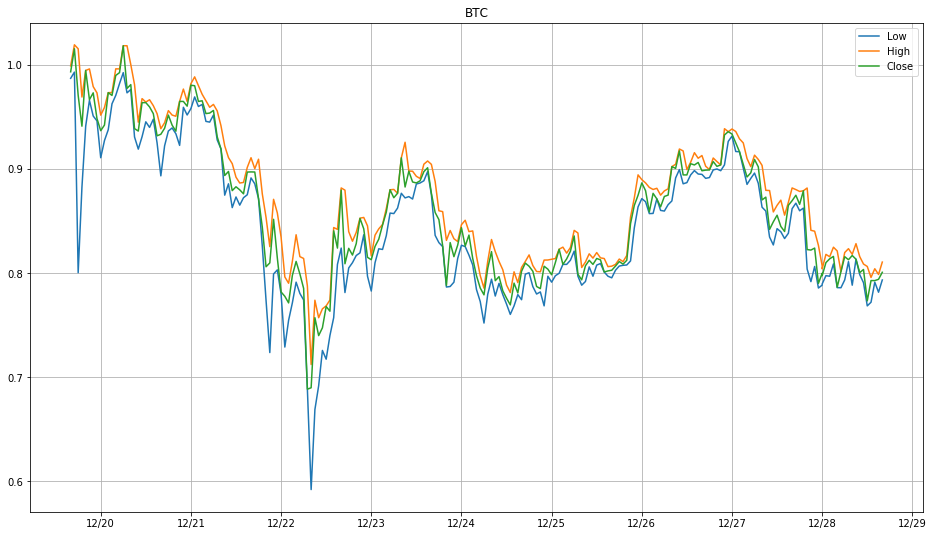

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid(True)
ax.plot(df['low'])
ax.plot(df['high'])
ax.plot(df['close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.legend(['Low', 'High', 'Close'])
ax.set_title(h.name[0])

In [11]:
h = holdings.iloc[1]
df = get_performance_history(auth_client, h) / (abs(h.payment))
df.info()

2017-12-20 00:14:53
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2017-12-19 18:00:00 to 2017-12-28 16:00:00
Data columns (total 5 columns):
low       216 non-null float64
high      216 non-null float64
open      216 non-null float64
close     216 non-null float64
volume    216 non-null float64
dtypes: float64(5)
memory usage: 10.1 KB


Text(0.5,1,'ETH')

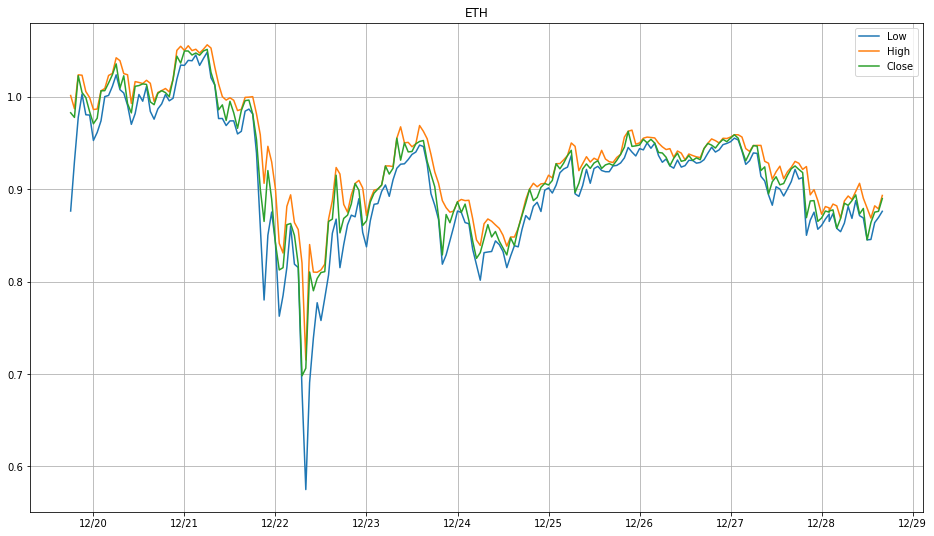

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid(True)
ax.plot(df['low'])
ax.plot(df['high'])
ax.plot(df['close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.legend(['Low', 'High', 'Close'])
ax.set_title(h.name[0])

### Archive Price Data

In [13]:
def store_price_data(data, product):
    assert isinstance(data, pd.DataFrame), 'data is not a dataframe: {}'.format(type(data))
    assert isinstance(product, str), 'invalid product: {}'.format(type(product))
    cwd = Path(os.getcwd()) / 'prices.h5'
    product = product.replace('-','_')
    print('storing {}'.format(product))
    data.to_hdf(cwd, product)

def archive_price_data(client, product, days):
    try:
        df = pd.read_hdf('prices.h5', product)
        print('loaded data')
    except KeyError as e:
        df = pd.DataFrame()
        print('product not found')
    except FileNotFoundError as e:
        print(e)
    try:
        end = datetime.now()
        start = end - timedelta(days=days)
        if len(df) > 0:
            if start < df.index[0]:
                print('dataframe not empty')
                if start < df.index[0]:
                    df = pd.concat([df, get_value_history(client, product, start, end, gran=timedelta(hours=1))], join='inner')
                    print('dataframes joined')
                    df = df.sort_index(axis=0)
                    print('dataframes sorted')
                    store_price_data(df, product)
    except Exception as e:
        print(type(e))
        print(e)

In [14]:
days = 120
products = ['BTC', 'ETH']
for p in products:
    p += '-USD'
    print('Archiving {} days of {}'.format(days, p))
    archive_price_data(auth_client, p, days)

Archiving 120 days of BTC-USD
loaded data
dataframe not empty
2017-08-30 22:58:39
2017-09-08 06:58:39
2017-09-16 14:58:39
2017-09-24 22:58:39
2017-10-03 06:58:39
2017-10-11 14:58:39
2017-10-19 22:58:39
2017-10-28 06:58:39
2017-11-05 14:58:39
2017-11-13 22:58:39
2017-11-22 06:58:39
2017-11-30 14:58:39
2017-12-08 22:58:39
2017-12-17 06:58:39
dataframes joined
dataframes sorted
storing BTC_USD
Archiving 120 days of ETH-USD
product not found


In [15]:
len(pd.DataFrame())

0

In [16]:
prod = 'ETH_USD'
df = pd.read_hdf('prices.h5', prod)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

""


In [17]:
pd.DataFrame().to_hdf('prices.h5', 'ETH_USD')

In [18]:
df.loc['2017-10-21 15:00:00']

KeyError: 'the label [2017-10-21 15:00:00] is not in the [index]'

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid(True)
ax.plot(df['low'])
ax.plot(df['high'])
ax.plot(df['close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.legend(['Low', 'High', 'Close'])
ax.set_title(prod.replace('_', '-'))

### Simulated Transactions

In [ ]:
holdings